In [224]:


from IDT_.idt_algo import IDT
from IDT_.ihmm_algo.ihmm import IHMM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 



In [225]:
testperson = 12

In [226]:
warnings.filterwarnings('ignore') 
gaze = pd.read_csv("../eye_tracking_expiriment\data\gaze_data_Doktor_12.csv")
gaze.head(10)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.280002,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive
1,0.290142,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive
2,0.300104,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive
3,0.312097,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive
4,0.322600,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive
5,0.334372,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive
6,0.345285,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive
7,0.357335,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive
8,0.368125,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive
9,0.379948,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive


In [227]:
gaze = gaze.dropna()
gaze.reset_index(drop=True, inplace=True)
gaze.shape

(72728, 39)

In [228]:
un = gaze["text_file"].unique()
un

array(['AI_HC_P01_text.txt', 'AI_HC_P01_MCQ.txt', 'AI_HC_P01_FIBQ.txt',
       'OR_HC_P01_text.txt', 'OR_HC_P01_MCQ.txt', 'OR_HC_P01_FIBQ.txt',
       'AI_SK_P01_text.txt', 'AI_SK_P01_MCQ.txt', 'AI_SK_P01_FIBQ.txt',
       'OR_SK_P01_text.txt', 'OR_SK_P01_MCQ.txt', 'OR_SK_P01_FIBQ.txt',
       'AI_KB_P01_text.txt', 'AI_KB_P01_MCQ.txt', 'AI_KB_P01_FIBQ.txt',
       'OR_KB_P01_text.txt', 'OR_KB_P01_MCQ.txt', 'OR_KB_P01_FIBQ.txt'],
      dtype=object)

In [229]:
im_HC_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[0])]
im_HC_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[3])]
im_SK_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[6])]
im_SK_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[9])]
im_KB_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[12])]
im_KB_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[15])]
im_HC_AI.reset_index(drop=True, inplace=True) 
im_HC_OR.reset_index(drop=True, inplace=True) 
im_SK_AI.reset_index(drop=True, inplace=True) 
im_SK_OR.reset_index(drop=True, inplace=True) 
im_KB_AI.reset_index(drop=True, inplace=True) 
im_KB_OR.reset_index(drop=True, inplace=True) 
im_HC_AI["device_time_stamp"] = im_HC_AI["device_time_stamp"] - im_HC_AI["device_time_stamp"][0]
im_HC_OR["device_time_stamp"] = im_HC_OR["device_time_stamp"] - im_HC_OR["device_time_stamp"][0]
im_SK_AI["device_time_stamp"] = im_SK_AI["device_time_stamp"] - im_SK_AI["device_time_stamp"][0]
im_SK_OR["device_time_stamp"] = im_SK_OR["device_time_stamp"] - im_SK_OR["device_time_stamp"][0]
im_KB_AI["device_time_stamp"] = im_KB_AI["device_time_stamp"] - im_KB_AI["device_time_stamp"][0]
im_KB_OR["device_time_stamp"] = im_KB_OR["device_time_stamp"] - im_KB_OR["device_time_stamp"][0]
im_SK_OR.head(5)

KeyError: 0

In [ ]:
left_x = im_SK_OR['left_gaze_point_on_display_area_x']*2560
left_y = im_SK_OR['left_gaze_point_on_display_area_y']*1440
right_x = im_SK_OR['right_gaze_point_on_display_area_x']*2560
right_y = im_SK_OR['right_gaze_point_on_display_area_y']*1440
t = im_SK_OR['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,648.528748,687.334747,279.065030,363.234830
1,0.011901,646.471329,689.306564,276.878579,373.384309
2,0.022380,652.526550,684.651642,275.416303,375.591960
3,0.033244,658.453293,684.651642,277.386374,375.591960
4,0.045403,657.703934,678.814087,280.946975,398.270273
...,...,...,...,...,...
37580,433.907691,724.598160,738.680344,829.980268,868.767071
37581,433.919957,725.127640,737.630539,829.751358,875.787334
37582,433.930738,735.905609,746.911697,826.583176,868.597298
37583,433.941038,731.504593,746.911697,843.250465,868.597298


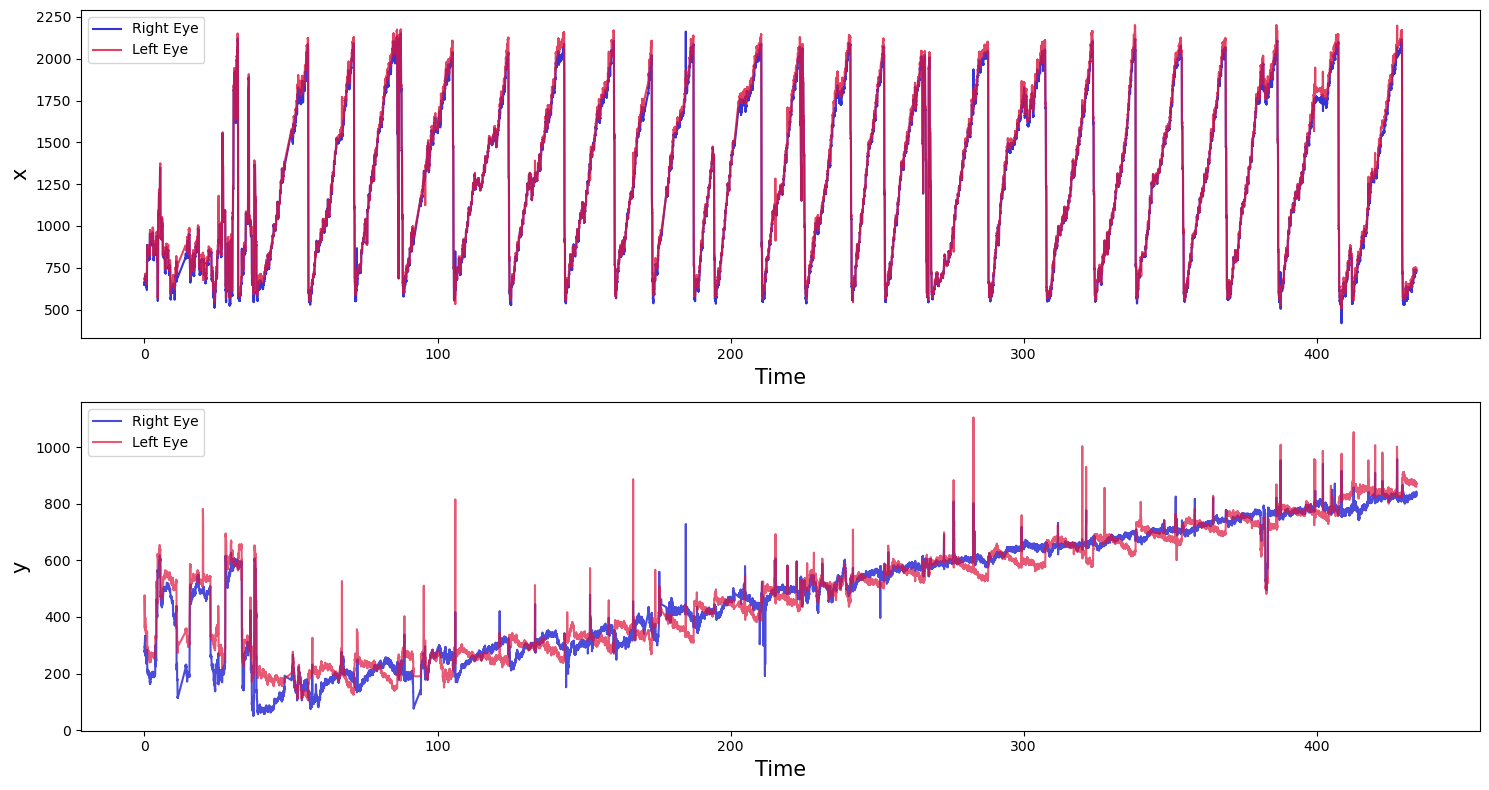

In [ ]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
last = gaze["Label"][0]
textfiles = [un[0], un[3],un[6] ,un[9] ,un[12], un[15]]
changes = []
skimming_parts = []
index = 0

for i, j in zip(gaze["Label"], gaze["text_file"]):
    if i != "Immersive" and j in textfiles:
        
        changes.append(gaze.loc[index])
        
    elif len(changes) > 0:
        
        skimming_parts.append(changes)
        changes = []
   
    index = index + 1


In [ ]:
for i in range(len(skimming_parts)):
    skimming_parts[i] = pd.DataFrame(skimming_parts[i])
    skimming_parts[i].reset_index(drop=True, inplace=True)
    skimming_parts[i]["device_time_stamp"] = skimming_parts[i]["device_time_stamp"] - skimming_parts[i]["device_time_stamp"][0]
     

In [ ]:
imerserive_parts = [im_HC_AI ,
im_HC_OR ,
im_SK_AI ,
im_SK_OR ,
im_KB_AI ,
im_KB_OR ]

In [ ]:
part = 9
left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
t = skimming_parts[part]['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,637.557182,675.684738,459.343829,536.360736
1,0.010999,634.056854,676.424561,460.025582,536.820230
2,0.021968,637.828751,680.627136,461.775584,539.185038
3,0.032908,640.841751,680.627136,460.782566,539.185038
4,0.045156,642.162170,678.556824,458.865108,539.558101
...,...,...,...,...,...
2068,37.124320,869.210205,877.641449,290.628247,341.656051
2069,37.135191,790.242615,790.572128,319.617670,364.039965
2070,37.146307,742.733994,768.423157,337.946362,372.397385
2071,37.157442,736.245499,760.299301,336.718426,375.521278


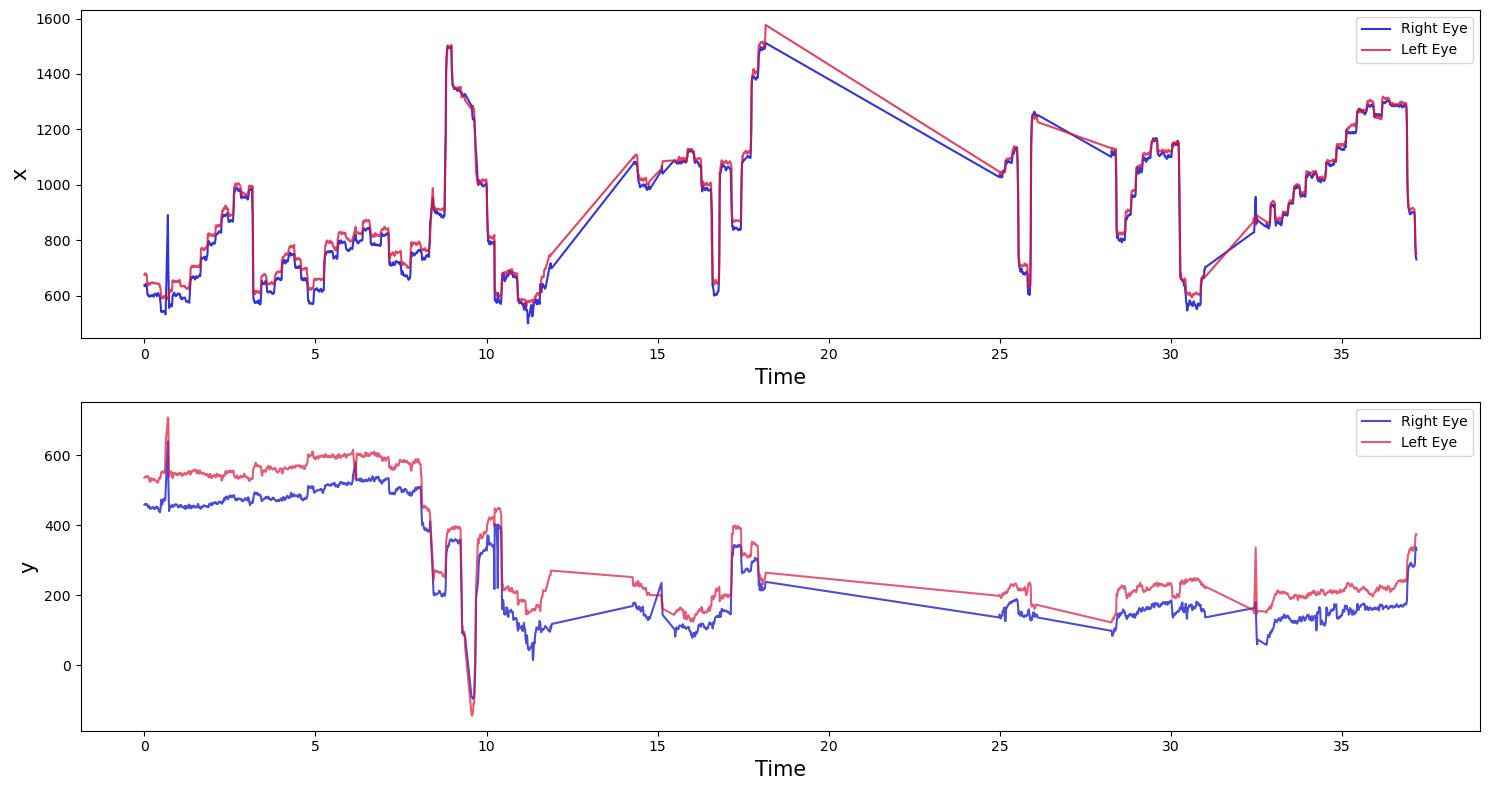

In [ ]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()


IHMM parameters re-estimation failed! Returning to original parameters.



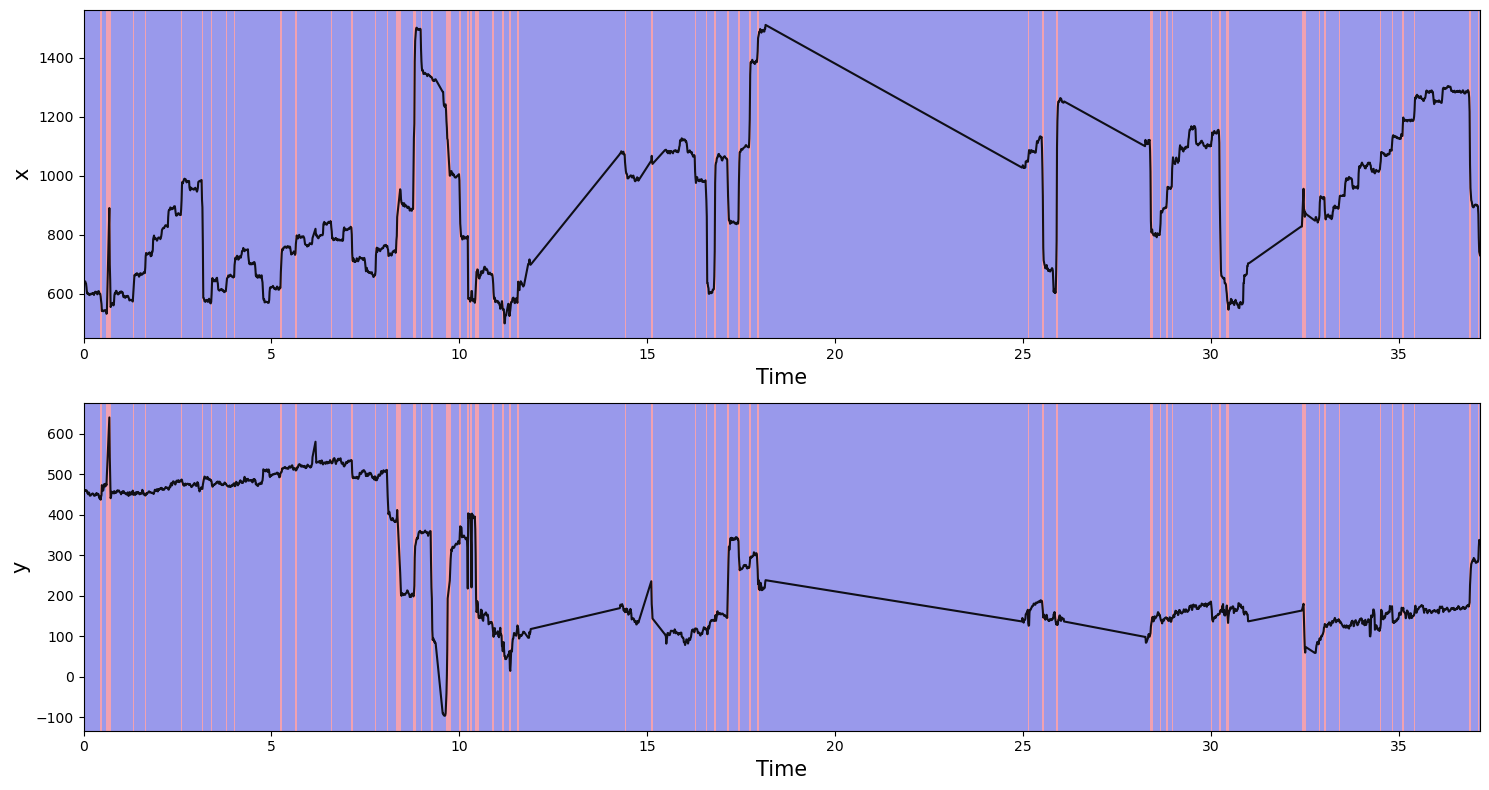

In [ ]:
t = eyes['t']
x = eyes['x_right']
y = eyes['y_right']

classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
classifier.process()
classifier.plot()

In [ ]:
skim_data = []
for i in range(len(skimming_parts)):
    part = i
    left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = skimming_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = skimming_parts[i].merge(fix, left_index=True, right_index=True)
    skim_data.append(round)


IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to 

In [ ]:
skim_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-58.830978,126.083649,577.419922,10.306093,129.645477,580.947754,0.642354,...,3.412582,True,AI_HC_P10_text.txt,10.0,18.0,Arial,HC,False,Skimming,0
1,0.010238,1,1,-58.830978,126.083649,577.419922,10.261043,129.623627,580.932861,0.642354,...,3.392380,True,AI_HC_P10_text.txt,10.0,18.0,Arial,HC,False,Skimming,0
2,0.022267,1,1,-58.966766,125.986443,577.350647,10.130804,129.532394,580.874084,0.642705,...,3.396759,True,AI_HC_P10_text.txt,10.0,18.0,Arial,HC,False,Skimming,0
3,0.032824,1,1,-59.328560,125.622200,576.964050,9.660319,129.133148,580.483337,0.643693,...,3.387146,True,AI_HC_P10_text.txt,10.0,18.0,Arial,HC,False,Skimming,1
4,0.043549,1,1,-59.328560,125.622200,576.964050,9.625421,129.095184,580.492859,0.643693,...,3.408020,True,AI_HC_P10_text.txt,10.0,18.0,Arial,HC,False,Skimming,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,8.416668,1,1,-70.503212,131.059113,591.871277,-2.698430,144.414795,599.004517,0.666773,...,3.360657,True,AI_HC_P10_text.txt,10.0,18.0,Arial,HC,False,Skimming,1
740,8.426927,1,1,-71.330826,130.647461,591.969910,-3.381093,144.108154,599.142029,0.668728,...,3.380157,True,AI_HC_P10_text.txt,10.0,18.0,Arial,HC,False,Skimming,1
741,8.437619,1,1,-71.333664,130.644073,591.971497,-3.544005,144.002182,599.225525,0.668735,...,3.393066,True,AI_HC_P10_text.txt,10.0,18.0,Arial,HC,False,Skimming,1
742,8.449493,1,1,-71.645134,130.342392,592.007812,-3.718187,143.837173,599.287537,0.669471,...,3.412933,True,AI_HC_P10_text.txt,10.0,18.0,Arial,HC,False,Skimming,1


In [ ]:
im_data = []
for i in range(len(imerserive_parts)):
    part = i
    left_x = imerserive_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = imerserive_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = imerserive_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = imerserive_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = imerserive_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = imerserive_parts[i].merge(fix, left_index=True, right_index=True)
    im_data.append(round)

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [ ]:
im_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-48.635777,112.409294,606.693970,19.602083,120.103409,609.808838,0.611644,...,5.265198,True,AI_HC_P10_text.txt,10.0,18.0,Arial,HC,False,Immersive,1
1,0.010157,1,1,-48.653427,112.433739,606.783020,19.611439,120.138306,609.940979,0.611669,...,5.227768,True,AI_HC_P10_text.txt,10.0,18.0,Arial,HC,False,Immersive,1
2,0.021403,1,1,-48.696072,112.485435,606.946045,19.612991,120.172569,610.050171,0.611738,...,5.180496,True,AI_HC_P10_text.txt,10.0,18.0,Arial,HC,False,Immersive,1
3,0.032029,1,1,-48.755016,112.626221,607.322876,19.613028,120.306023,610.440674,0.611805,...,5.095825,True,AI_HC_P10_text.txt,10.0,18.0,Arial,HC,False,Immersive,1
4,0.043372,1,1,-48.777355,112.658356,607.397095,19.609577,120.361877,610.550232,0.611843,...,5.046539,True,AI_HC_P10_text.txt,10.0,18.0,Arial,HC,False,Immersive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7848,99.060168,1,1,-15.779506,128.699951,568.349487,49.899052,118.999115,564.244019,0.537233,...,3.003052,True,AI_HC_P10_text.txt,10.0,18.0,Arial,HC,False,Immersive,1
7849,99.071418,1,1,-15.741820,128.559402,568.145203,49.870689,118.884308,564.036499,0.537154,...,3.003021,True,AI_HC_P10_text.txt,10.0,18.0,Arial,HC,False,Immersive,1
7850,99.082795,1,1,-15.741939,128.538132,568.151733,49.862911,118.859512,564.046875,0.537154,...,3.011032,True,AI_HC_P10_text.txt,10.0,18.0,Arial,HC,False,Immersive,1
7851,99.093639,1,1,-15.765579,128.552109,568.284058,49.861595,118.864723,564.123413,0.537204,...,3.011322,True,AI_HC_P10_text.txt,10.0,18.0,Arial,HC,False,Immersive,1


In [ ]:
colunms_to_drop = ['Reading', 'text_file', 'passage_index', 'AI', 'Label']
for i in range(len(im_data)):
    im_data[i] = im_data[i].drop(columns = colunms_to_drop)
for i in range(len(skim_data)):
    skim_data[i] = skim_data[i].drop(columns = colunms_to_drop)

In [ ]:
y_label = []
x_data = []
for i in range(len(im_data)):
    y_label.append("immersive")
    x_data.append(im_data[i])
for i in range(len(skim_data)):
    y_label.append("skimming")
    x_data.append(skim_data[i])

In [ ]:
com_DF = pd.concat(x_data, ignore_index=True)

com_DF.to_csv(f'x_data_{testperson}.csv', index = False)
np.savetxt(f'y_label_{testperson}.csv', y_label, fmt='%s', delimiter=",")